# metrics 

> common metrics for classification, regresssion, clustering, and ranking

In [ ]:
#| default_exp metrics

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#| export
def accuracy_score(y_true, y_pred, *, normalize=False, weights=None):
    """expects numpy.array"""
    scores = (y_true==y_pred).astype(float) # bool*int, int*float not allowed
    if weights is not None: scores *= weights 
    scale = weights.sum() if weights is not None else scores.size
    return scores.sum()/scale.astype(float) if normalize else scores.sum()

In [ ]:
x = np.array([0, 1, 2, 3])
y = np.array([0, 1, 2, 5])
accuracy_score(x,y, normalize=True, weights = np.array([1, 1, 1, 0], dtype=np.int32))

1.0

In [ ]:
#| export
def precision_recall_fscore(y_true, y_pred):
    labels = np.union1d(y_true, y_pred)
    recs = np.zeros(labels.size)
    pres = np.zeros(labels.size)
    for i, label in enumerate(labels):
        tp = (y_true==label).astype(float) @ (y_pred==label)
        fp = (y_true!=label).astype(float) @ (y_pred==label)
        fn = (y_true==label).astype(float) @ (y_pred!=label)
        recs[i] = tp/(tp+fn)
        pres[i] = tp/(tp+fp)
    fs = 2*recs*pres/(recs+pres)
    return pres.mean(), recs.mean(), fs.mean()

In [ ]:
#| export
def precision_score(y_true, y_pred):
    """compute the average precision, even in the binary case"""
    prec, _, _ = precision_recall_fscore(y_true, y_pred)
    return prec

In [ ]:
#| export
def recall_score(y_true, y_pred):
    """compute the average recall, even in the binary case"""
    _, rec, _ = precision_recall_fscore(y_true, y_pred)
    return rec

In [ ]:
#| export
def f1_score(y_true, y_pred):
    """compute the average f1, even in the binary case"""
    _, _, f1 = precision_recall_fscore(y_true, y_pred)
    return f1

In [ ]:
(
    precision_score(np.array([0, 1, 1,0]), np.array([1,1,0,0])),
    recall_score(np.array([0, 1, 1,0]), np.array([1,1,0,0])),
    f1_score(np.array([0, 1, 1,0]), np.array([1,1,0,0]))
)

(0.5, 0.5, 0.5)

In [ ]:
#| export
def log_loss(y_true, y_pred, *, sample_weights=None):
    """ y_true.dim == 1, y_pred.dim == 2, sample_weights.dim == 1"""
    probs = y_pred[np.arange(y_true.size),y_true]
    if sample_weights is not None: 
        loss = -np.log(probs) @ sample_weights / sample_weights.sum()
    else: 
        loss = -np.log(probs).mean()
    return loss

In [ ]:
log_loss(np.array([0, 1, 1]), np.array([[0.1, 0.9], [0.9, 0.1], [0.1, 0.9]]), sample_weights=np.array([1, 1, 100]))

0.14844335050755605

In [ ]:
#| export
def roc_curve(y_true, y_score):
    y = np.stack([y_true, y_score], axis=-1)
    idxs = np.argsort(y, axis=0)[::-1,-1] # idxs that sort arr by score descending
    y = y[idxs]
    tcum = np.cumsum(y[:,0])
    tpr = tcum/tcum[-1]
    fcum = np.cumsum(1-y[:,0])
    fpr = fcum/fcum[-1]
    thresholds = y[:,1]
    return fpr, tpr, thresholds

In [ ]:
#| export
def roc_auc_score(y_true, y_score):
    fpr, tpr, _ =  roc_curve(y_true, y_score)
    fpr_inc = (np.roll(fpr,-1) - fpr)[:-1]
    auc = (fpr_inc * tpr[:-1]).sum()
    return auc

In [ ]:
import sklearn.metrics as skm

In [ ]:
a1 = np.array([1,0,1,0,1,1,1,1])
a2 = np.random.random(8)
assert roc_auc_score(a1, a2) == skm.roc_auc_score(a1, a2)

In [ ]:
#| export
class RocCurveDisplay:
    """plot result of `roc_curve` which returns fpr, tpr, _ """
    @classmethod
    def from_predictions(cls, y_true, y_score):
        fpr, tpr, _ = roc_curve(y_true, y_score)
        return plt.plot(fpr, tpr)
    
    @classmethod
    def from_estimator(cls, clf, y_true, y_score):
        raise NotImplemented

[<matplotlib.lines.Line2D>]

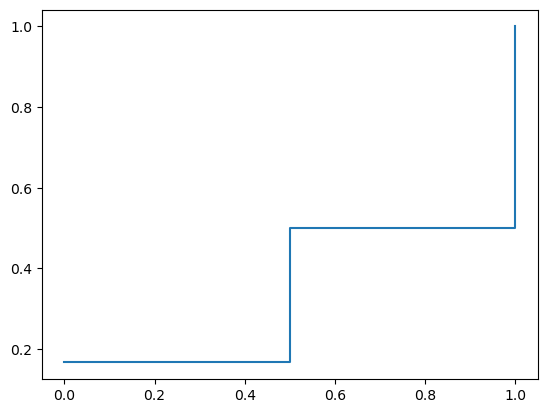

In [ ]:
RocCurveDisplay.from_predictions(a1, a2)

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()